In [29]:
import cv2
import numpy as np
import os
import pytesseract
import re
image_frames = 'image_frames/'
pytesseract.pytesseract.tesseract_cmd = r'D:\Tesseract-OCR\tesseract.exe'
from PIL import Image

In [23]:
img = cv2.imread('sample_image_cmd.JPG')

In [24]:
def ocr_core(img):
    text = pytesseract.image_to_string(img)
    return text

def get_grayscale(image):
    if len(image.shape) == 2 or image.shape[2] == 1:
        return image
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def remove_noise(image):
    return cv2.medianBlur(image, 5)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [25]:
img = get_grayscale(img)
img = thresholding(img)
img = remove_noise(img)

print(ocr_core(img))

def longest_common_subsequence(X, Y):
    m, n = len(X), len(Y)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if X[i - 1] == Y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    i, j = m, n
    lcs = []
    while i > 0 and j > 0:
        if X[i - 1] == Y[j - 1]:
            lcs.append(X[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:
            i -= 1
        else:
            j -= 1

    return " ".join(reversed(lcs))


# main_sentence = """ """
# other_sentence = """You Dat Unc Atte Unc Mir Lar Nat Unt ash ccr < > C 0 amazon in/s?k=rain+water&crid= ZPROALJK3C2O9&sprefix=rain+water"2Caps%2C258&ref-nb_sb_noss Relaunch to updlate Favorites Fowdo steppern_ Raspperry Pi Tutori_ DealeXtreme Cccl; https;/www,course Water Leve Control Projects Working principle Simple Prcximity Se_ Welcomel Welcom  Career Ropotics AIl Bookmarks amazon Deliver to Annu rain water Hello, Maninder Retums Subtotal Sirsa 125055 EN Account & Lists & Orders Cart 7549.00 prime Cart =Al Car & Motorbike Amazon miniTV Sell Baby Health; Household & Personal Care Gift Cards Pet Supplies Subscribe & Save Browsing History Customer Service at Indian Festival SHOP NOW Finale days polDf BOLDRT ZEXEL Snuggling Cloud Rain NeeRain SS 304 Rooftop Rainwater Rainy FL 500 Self-Cleaning Dual RainGain Rainwater Harvesting Filter SPIRY FI ENGINEERS Aqua 5 Micron {549.00 Diffuser; Snuggle Cloud; Raindrop Harvesting Filter; Pack of Intensity Rainwater Harvesting Filter (Stainless Steel Filter Mesh; 75 mm) Dia & 20" Length Bag Bore Water prime Humidifier; Mushroom Waterfall Suitable for Area 5400 Square Filter Lamp, Anxiety and Stress Relief; Feet; Black Installation Kit Great Indian Festival 463 '6,500 300+ bought in month Save extra with No Cost EMI {3,250MRP:43958 (18% off) '2,099 MRP: 42,999 (30%/ off) prime FREE Delivery by Saturday; 11 '26,500 Save extra with No Cost EMI '280MRP: #599 (53% off) Save <35 with coupon November Save extra with No Cost EMI Save 5% with coupon FREE Delivery by Monday, 13 November prime FREE Delivery by Saturday, 11 FREE Delivery by Monday; 13 November for (prime FREE Delivery by Sunday, 12 Prime members November for Prime members November Rain Water Collection By Blake Holliday K FITG18 Mens Raincoat with Hood Rain Cloud Humidifier Water Drip, 2 Rain Water Collection (Foxhole KOHLER Rain Shower Round 203mm UJEAVETTE@ Rain Cloud Humidifier Water Fighter-Rain Coat for Men Humidifier with Essential Oil Homestead Book 11) (Rain Duet); with Katalyst Air- Water Drip Colors Night Light Waterproof Pant and Carrying Diffuser;45Oml Cloud Humidifier by Blake Holliday induction Spray Technology Mushroom Lamp Diffuser Grain Pouch; Navy Blue Rain Drop, Mushroom Humidifier_ (Polished Chrome) Green Kindle Edition *8,099 MRP: 213498 (39% off) {415MRP: =699 (41% otf) 11,124 *0 kindle unlimited Great Indian Festival Save extra with No Cost EMI Free with Kindle Unlimited membership prime Save extra with No Cost EMI "6,450MRP: #8-688 (25% off) Get it Tuesday, 21 November Friday, 24 Learn More https:/ /www amazon in/events greatindianfestivaV&ref_=ine_gw_j23_03_swm/?_encoding-UTF8Rref_=nav_swm_SK= Fridav 24 Movember - Tuesdav 28 ith Ao Cost FM November 10.40 06-11-2023 New? Upto Past Geip"""

# lcs = longest_common_subsequence(main_sentence.split(), other_sentence.split())
# unique_content = " ".join(word for word in other_sentence.split() if word not in lcs)

# print("Longest Common Subsequence:", lcs)
# print("Unique content:", unique_content)

In [26]:
temp_list = os.listdir(image_frames)

temp_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
temp_list = [file for file in temp_list if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

In [30]:
current_frame = 0
final_string = ''
for image in temp_list[:10]:

    if len(final_string) == 9999999:
        final_string = ''
    image_path = os.path.join(image_frames,image)
    print(image_path)
    result = pytesseract.image_to_string(Image.open(image_path))
#     result = reader.readtext(image_path)
#     result = np.take(np.array(result), indices=[1], axis=1)
#     result =  '\n'.join(item[0] for item in result)
    print(result)
    lcs = longest_common_subsequence(final_string.split(), result.split())
    unique_content = " ".join(word for word in result.split() if word not in lcs)
#     print(unique_content)
    unique_content = unique_content.lower()
#     unique_content = remove_non_text(unique_content, keep_symbols=symbols_to_keep)
#     unique_content = correct_ocr_errors(unique_content)

#     print(unique_content,end='\n')
    if unique_content in final_string:
        continue
    else:
        final_string = final_string + ' '+ unique_content
        with open('test_storage.txt','a',encoding='utf8') as f:
            f.write(unique_content+'\n')
    
#     print(result)
    print('-_'*30)

image_frames/0.png
guys....
Now u'm going to show you

How to install any program using cmd as admin
Now i'm going to install teamviewer

1. Open cmd as Admi

ail


-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
image_frames/1.png
guys....
Now u'm going to show you
£

How to install any program using cmd as admin
Now i'm going to install teamviewer

1. Open cmd as Admi

ail


-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
image_frames/2.png
Mi guys...
low u'm going to show you

How to install any program using cmd as admin

Now i'm going to install teamviewer

1. Open cmd as Admin

) al 4

-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
image_frames/3.png
| ai

How to install any program using cmd as admin
Now i'm going to install teamviewer

1. Open cmd as Admi

ail


-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
image_frames/4.png
| ee
IH1 guys

Now Um going to show

How to install any program using cmd as admin
Now i'm going to

In [33]:
current_frame = 0
final_string = ''

def break_tesseract_output_into_lines(tesseract_output):
    lines = tesseract_output.split('\n')
    cleaned_lines = [line.strip() for line in lines if line.strip()]
    return cleaned_lines

for image in temp_list[78:110]:

    if len(final_string) == 9999999:
        final_string = ''
    image_path = os.path.join(image_frames,image)
    print(image_path)
    img = cv2.imread(image_path)
    img = get_grayscale(img)
    img = thresholding(img)
    img = remove_noise(img)
    result = pytesseract.image_to_string(Image.open(image_path))


    # Use regular expression to find the command
    text_lines = break_tesseract_output_into_lines(result)

    for x in text_lines:
        command_match = re.search(r'>\s*([^\n]+)', x)

        if command_match:
            command = command_match.group(1)
            print("Command entered:", command)
        else:
            print("No command found.")


image_frames/78.png
Command entered: Local Disk (D) > > Sm | 2
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
Command entered: 2009 Microsoft Corporation. 11 rights reserved.
Command entered: D:\Sof tuare,
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
image_frames/79.png
Command entered: Local Disk (D) > > Sm | 2
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
Command entered: D:\Sof tuares
No command found.
No command found.
No command found.
No command found.
No comman

No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
Command entered: D:\Sof tuary
image_frames/96.png
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command fou

In [32]:
print(text)

NameError: name 'text' is not defined

In [69]:
import re

# Use regular expression to find the command
text_lines = break_tesseract_output_into_lines(text)

for x in text_lines:
    command_match = re.search(r'>\s*([^\n]+)', x)

    if command_match:
        command = command_match.group(1)
        print("Command entered:", command)
    else:
        print("No command found.")


No command found.
No command found.
Command entered: pip install pytesseract
No command found.
Command entered: =8.0.0 in c:\users\10710548\appdata\ local \programs\python\python39\lib\site-packages (from pytesseract) (9.4.0)
Command entered: =21.3 in c:\users\1071548\appdata\ local \programs\python\python39\lib\site-packages (from pytesseract) (21.3)
Command entered: =2.0.2 in c:\users\1710548\appdata\ local \programs\python\python39\lib\site-packages (from packaging>=21.3->pytesseract) (3.0.9)
No command found.
No command found.
No command found.
Command entered: echa “maninder”
No command found.
No command found.
Command entered: echo “maninder™
No command found.
Command entered: ipconfig
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command 

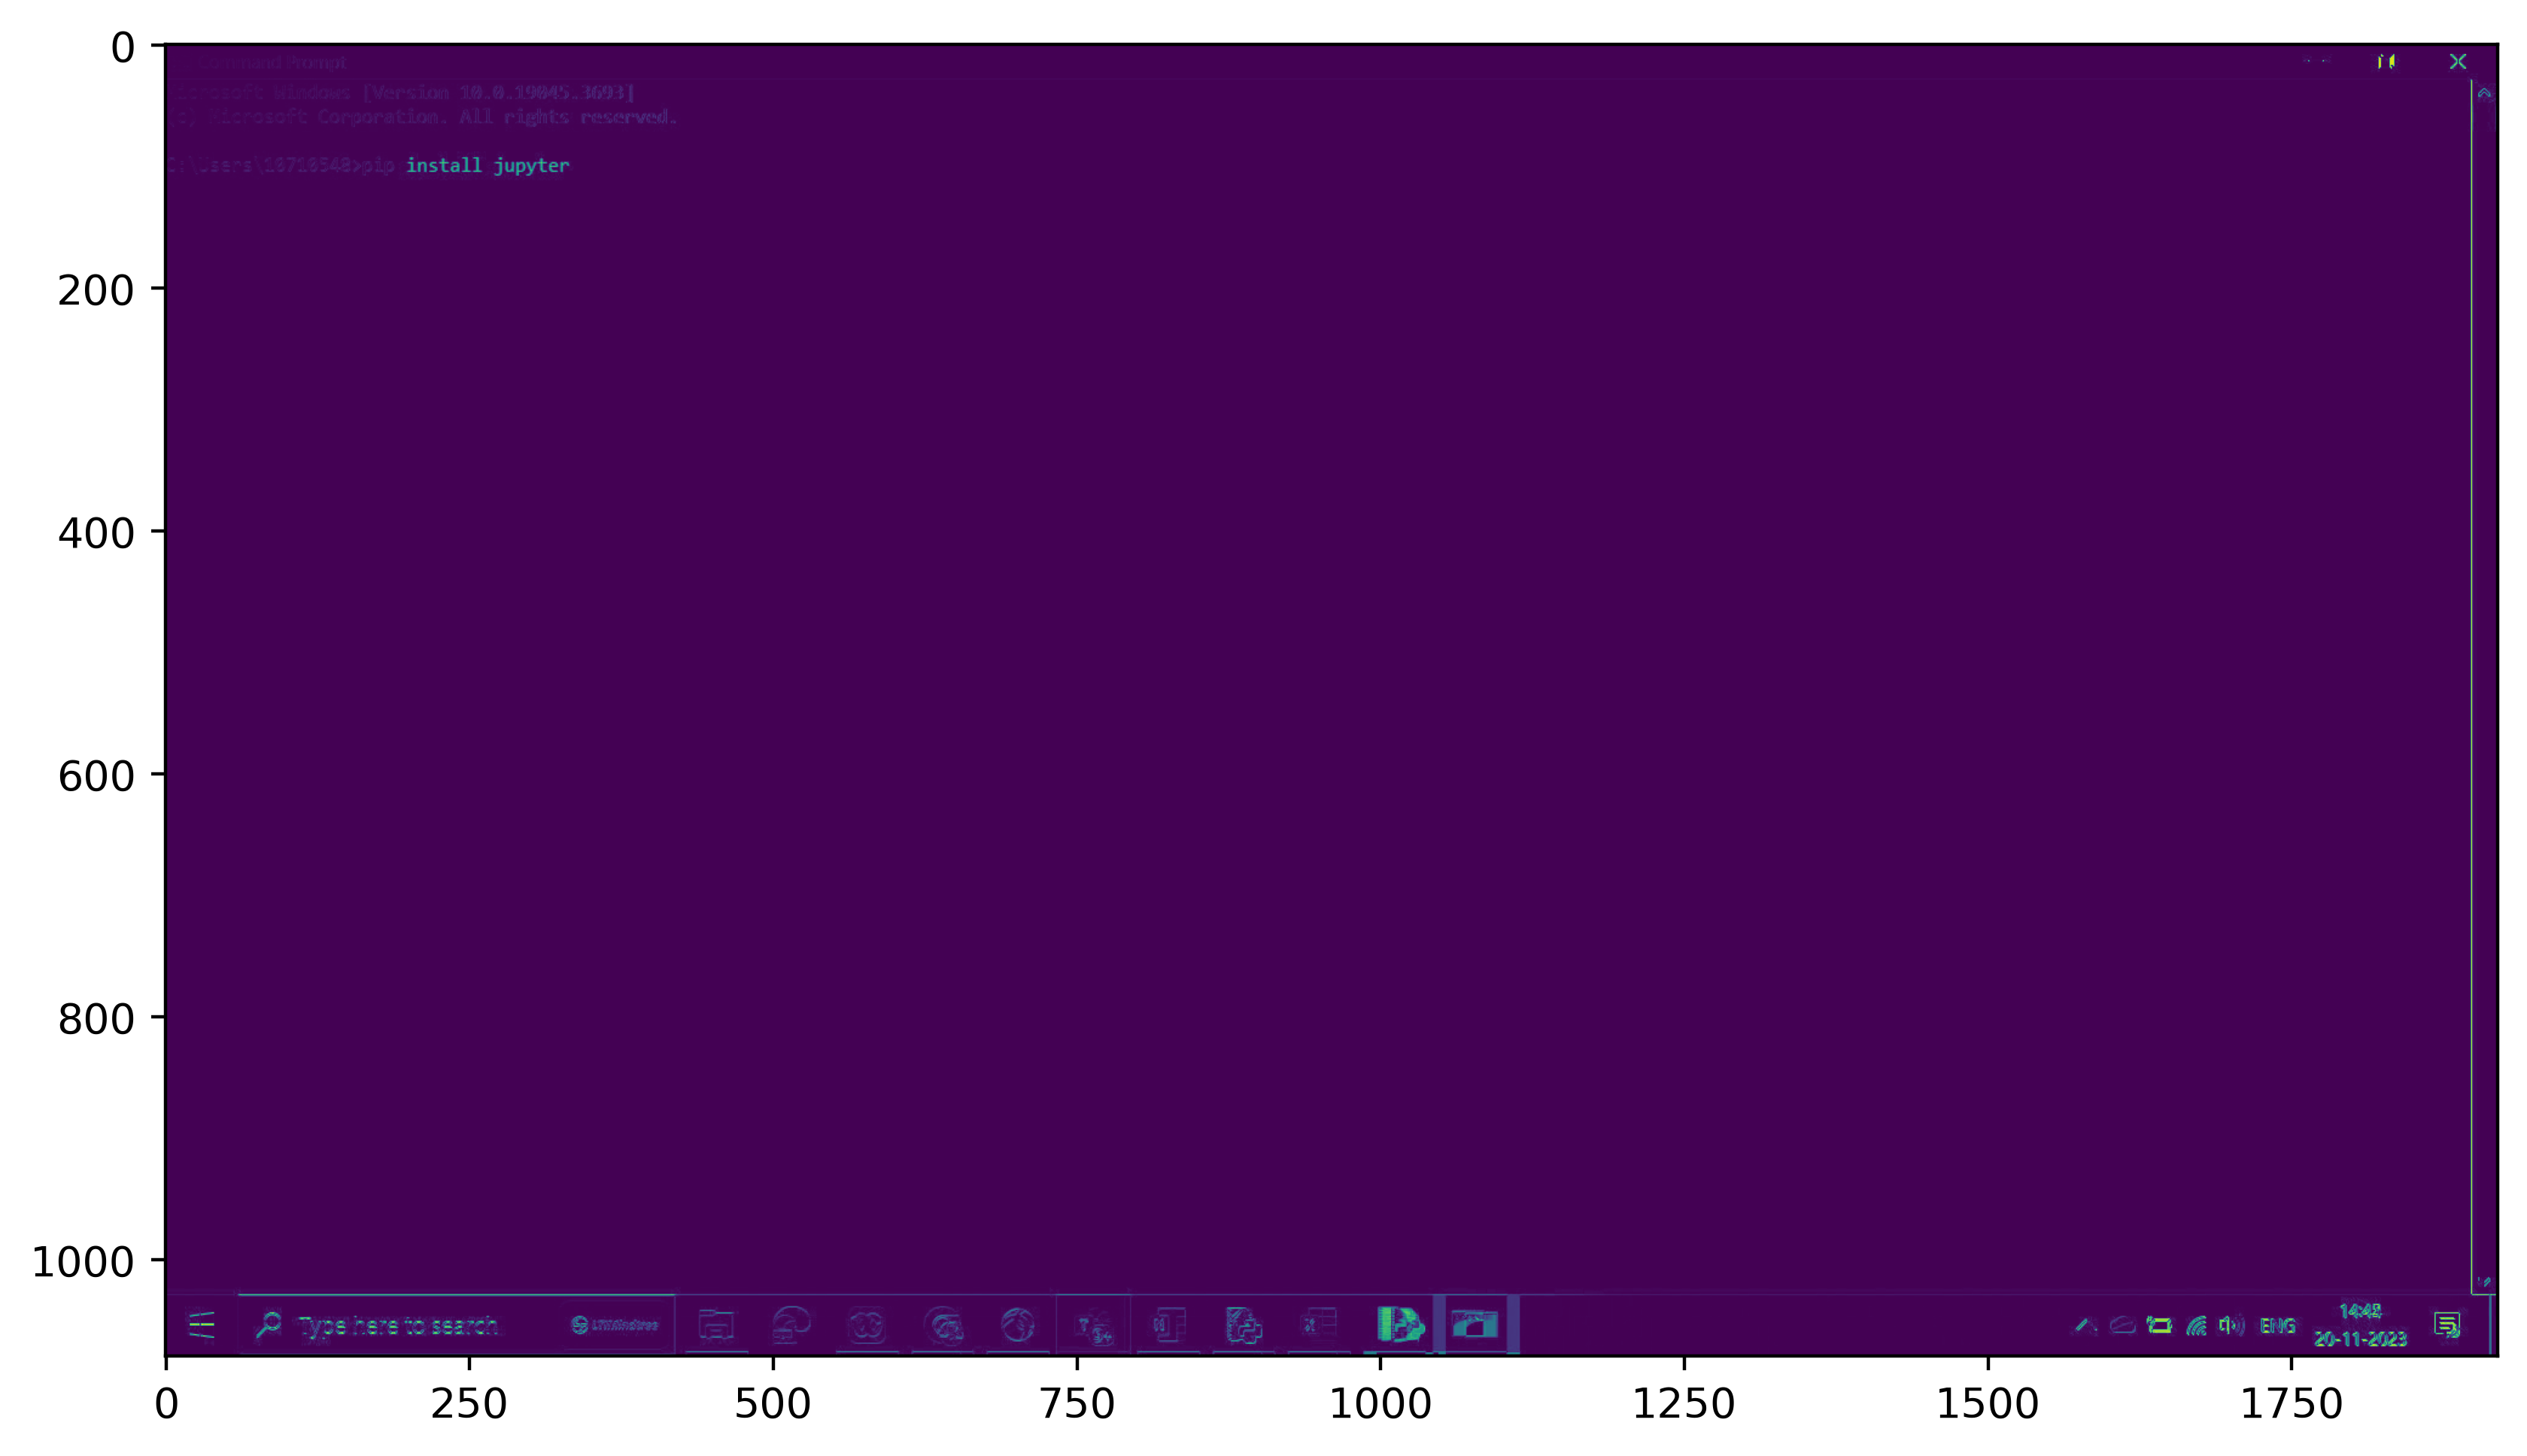

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def overlap_and_append(frame1, frame2):
    frame2 = cv2.resize(frame2, (frame1.shape[1], frame1.shape[0]))
    # Convert frames to grayscale
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference between frames
    diff = cv2.absdiff(gray1, gray2)
    
    """
    below code for calculating absolute differnece
    """

    # Threshold the difference to get a binary mask
    _, thresholded = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract the region of interest (ROI) from frame2
    roi = frame2.copy()
    cv2.drawContours(roi, contours, -1, (0, 0, 255), 2)

    # Append the ROI to the existing frame
#     result = np.concatenate((frame1, roi), axis=0)


#     return result
    return diff

# Example frames
frame1 = cv2.imread('sample_image_cmd.JPG')
frame2 = cv2.imread('sample_image_cmd1.JPG')

# Overlap frames and append new content
result_frame = overlap_and_append(frame1, frame2)

# Display the result
plt.figure(figsize=(10,10),dpi=400)
plt.imshow(result_frame)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [38]:
cv2.imwrite('to_delete.jpg', result_frame)

True

In [37]:
# img = cv2.imread(result_frame)
img = get_grayscale(result_frame)
img = thresholding(img)
img = remove_noise(img)
result = pytesseract.image_to_string(Image.open(image_path))


# Use regular expression to find the command
text_lines = break_tesseract_output_into_lines(result)

for x in text_lines:
    command_match = re.search(r'>\s*([^\n]+)', x)

    if command_match:
        command = command_match.group(1)
        print("Command entered:", command)
    else:
        print("No command found.")

AttributeError: 'numpy.ndarray' object has no attribute 'read'